<a href="https://colab.research.google.com/github/Vlad-Pavliyk/-/blob/main/lab10colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

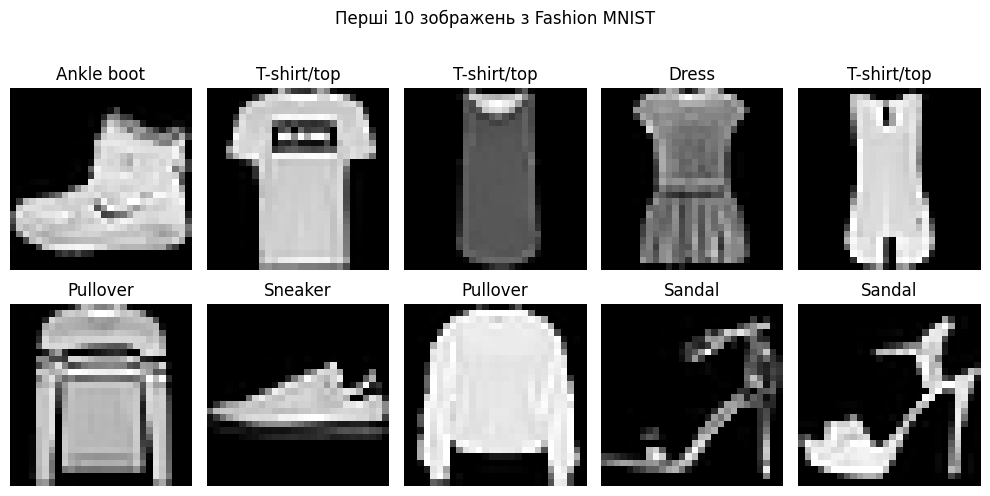

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.6701 - loss: 0.8956 - val_accuracy: 0.8490 - val_loss: 0.4045 - learning_rate: 0.0010
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.8460 - loss: 0.4283 - val_accuracy: 0.8712 - val_loss: 0.3396 - learning_rate: 0.0010
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.8716 - loss: 0.3559 - val_accuracy: 0.8857 - val_loss: 0.3114 - learning_rate: 0.0010
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8856 - loss: 0.3202 - val_accuracy: 0.8949 - val_loss: 0.2830 - learning_rate: 0.0010
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8967 - loss: 0.2831 - val_accuracy: 0.9015 - val_loss: 0.2710 - learning_rate: 0.0010


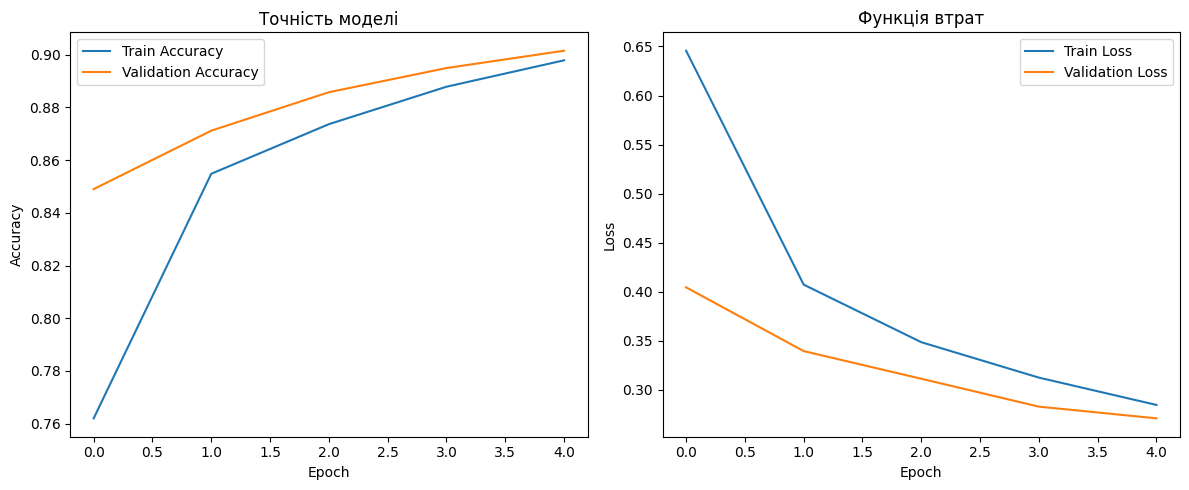


Test Accuracy: 0.8996
Test Loss: 0.2837
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.86      0.85      0.85      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.83      0.86      0.84      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.72      0.69      0.70      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



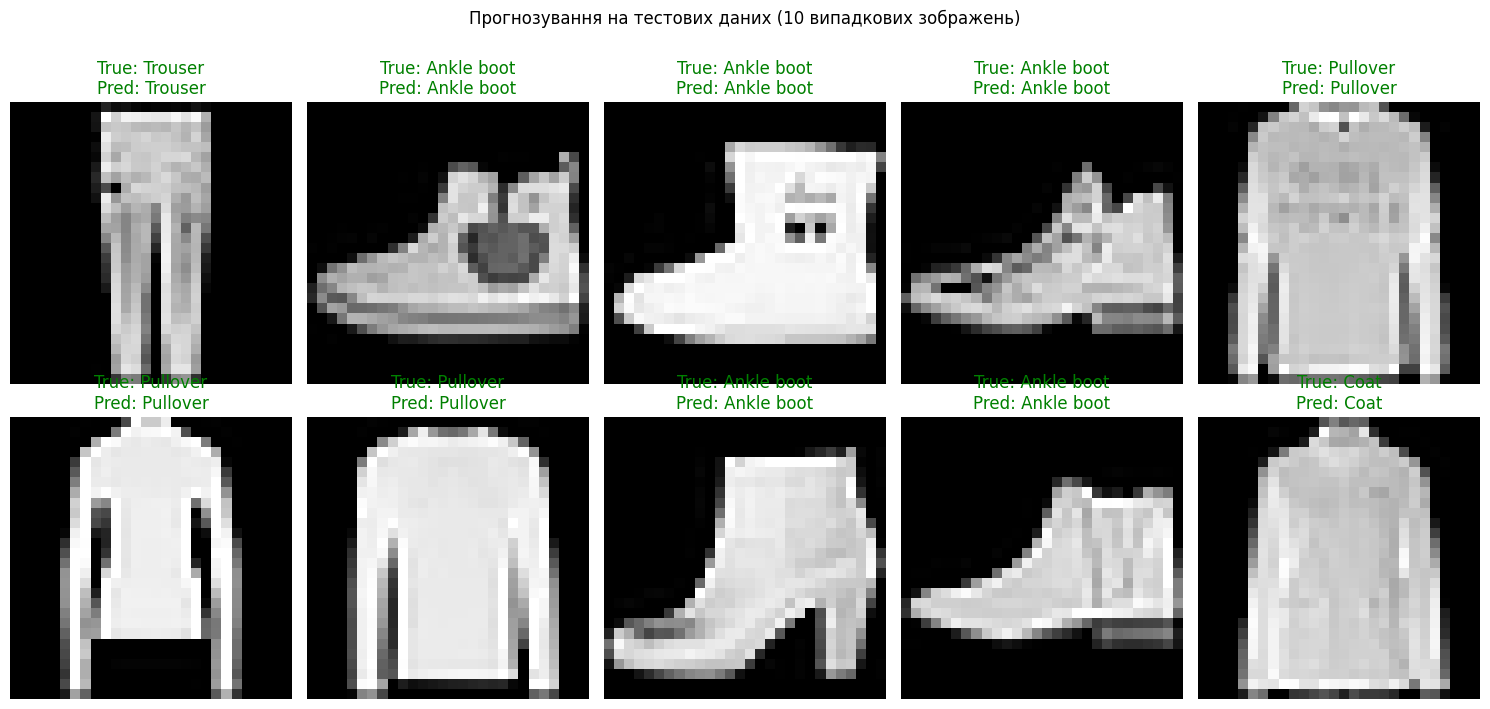

In [1]:
# Лабораторна робота №10 — Fashion MNIST + CNN (Colab Ready)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import random

# 1. Завантаження датасету
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 2. Підготовка даних
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. Виведення перших 10 зображень
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[np.argmax(train_labels[i])])
    plt.axis('off')
plt.suptitle('Перші 10 зображень з Fashion MNIST', y=1.02)
plt.tight_layout()
plt.show()

# 4. Побудова моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# 5. Колбеки
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
]

# 6. Навчання моделі
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# 7. Криві навчання
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність моделі')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функція втрат')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# 9. Classification report
y_pred = model.predict(test_images)
print('\nClassification Report:')
print(classification_report(np.argmax(test_labels, axis=1),
                          np.argmax(y_pred, axis=1),
                          target_names=class_names))

# 10. Візуалізація прогнозів для 10 випадкових зображень
plt.figure(figsize=(15, 7))
for i in range(10):
    idx = random.randint(0, len(test_images)-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[np.argmax(test_labels[idx])]
    pred_label = class_names[np.argmax(y_pred[idx])]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.axis('off')
plt.suptitle('Прогнозування на тестових даних (10 випадкових зображень)', y=1.02)
plt.tight_layout()
plt.show()
